<a href="https://colab.research.google.com/github/nandu26m/E-Commerce-Food-Delivery-Data-Analytics-Project/blob/main/notebooks/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Questions & Insights from Food Delivery Dataset

## User Behavior & Segmentation
1. How many active users place orders monthly?  
2. What is the distribution of orders per user? (e.g., frequent vs occasional users)  
3. What percentage of users are loyal customers vs new users?  
4. Which cities have the highest user signup rates?  
5. What devices do users most commonly use to place orders?  
6. What is the average time between user signup and first order?  
7. How often do users log in before placing an order?  
8. Which users have the highest lifetime order value?  
9. What is the average order frequency per user?  
10. How do user order patterns vary by time of day or day of week?  

## Restaurant & Menu Insights
11. Which restaurants receive the most orders overall?  
12. What are the top cuisines ordered by users?  
13. How does restaurant rating correlate with the number of orders?  
14. Which menu items are the most popular across all restaurants?  
15. What is the average price per menu item by cuisine?  
16. How often do menu items go out of availability?  
17. How do menu item price changes affect sales volume?  
18. Which restaurants have the highest average order value?  
19. Are there restaurants with consistently low ratings? Why?  
20. Which cities have the most diverse cuisine options?  

## Order & Payment Analysis
21. What is the average order value (AOV) across the platform?  
22. How does AOV vary by user segment (loyal vs new)?  
23. What is the distribution of order statuses? (completed, canceled, etc.)  
24. What are the common cancellation reasons?  
25. Which payment methods are most popular among users?  
26. Is there a payment method associated with higher order success rates?  
27. How often do promotions get applied to orders?  
28. What is the average discount amount per promotion?  
29. How much revenue is generated from promoted orders vs regular orders?  
30. Are certain payment methods linked to higher order cancellation rates?  

## Delivery Performance
31. What is the average delivery time from pickup to drop-off?  
32. How does delivery time vary by city or region?  
33. Which delivery persons have the best on-time delivery rates?  
34. What percentage of deliveries experience status delays?  
35. How many delivery attempts are made before successful delivery?  
36. Are there delivery time patterns by time of day or day of week?  
37. How does delivery distance impact delivery time and user satisfaction?  
38. What is the average number of status updates per delivery?  
39. How often do delivery delays lead to order cancellations?  
40. Which delivery person has the highest customer rating?  

## Ratings & Feedback
41. What is the average customer rating per restaurant?  
42. Which restaurants have the most positive or negative feedback?  
43. How does customer rating correlate with order frequency?  
44. Are lower-rated orders more likely to be canceled or delayed?  
45. What keywords or themes appear most in customer feedback?  
46. How do ratings vary by cuisine or city?  
47. What percentage of orders receive customer ratings?  
48. Is there a difference in ratings between users on different devices?  
49. How do promotions affect customer satisfaction and ratings?  
50. What improvements can be identified from common feedback issues?  


# Step 1: Setup Your Environment in Google Colab

In [2]:
from google.colab import files

uploaded = files.upload()  # Upload CSV files here

Saving deliveries.csv to deliveries (1).csv
Saving delivery_persons.csv to delivery_persons (1).csv
Saving delivery_status_history.csv to delivery_status_history (1).csv
Saving menu_item_history.csv to menu_item_history (1).csv
Saving menu_items.csv to menu_items (1).csv
Saving order_items.csv to order_items (1).csv
Saving order_promotions.csv to order_promotions (1).csv
Saving orders.csv to orders (1).csv
Saving payment_methods.csv to payment_methods (1).csv
Saving payments.csv to payments (1).csv
Saving promotions.csv to promotions (1).csv
Saving ratings.csv to ratings (1).csv
Saving restaurants.csv to restaurants (1).csv
Saving user_logins.csv to user_logins (1).csv
Saving users.csv to users (1).csv


*   Alternatively, mount Google Drive:
*   Then use pandas to load files from drive path

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Step 2: Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for datetime handling
from datetime import datetime

# Step 3: Load Your Data

In [5]:
df_users = pd.read_csv('users.csv', parse_dates=['signup_date'])
df_restaurants = pd.read_csv('restaurants.csv')
df_menu_items = pd.read_csv('menu_items.csv')
df_orders = pd.read_csv('orders.csv', parse_dates=['order_datetime', 'created_at', 'updated_at', 'canceled_at'])
df_order_items = pd.read_csv('order_items.csv')
df_delivery_persons = pd.read_csv('delivery_persons.csv')
df_deliveries = pd.read_csv('deliveries.csv', parse_dates=['pickup_time', 'drop_time', 'created_at', 'updated_at'])
df_payments = pd.read_csv('payments.csv', parse_dates=['payment_datetime', 'created_at', 'updated_at'])
df_ratings = pd.read_csv('ratings.csv', parse_dates=['created_at', 'updated_at'])
df_payment_methods = pd.read_csv('payment_methods.csv')
df_promotions = pd.read_csv('promotions.csv', parse_dates=['start_date', 'end_date'])
df_order_promotions = pd.read_csv('order_promotions.csv')
df_menu_item_history = pd.read_csv('menu_item_history.csv', parse_dates=['updated_at'])
df_delivery_status_history = pd.read_csv('delivery_status_history.csv', parse_dates=['timestamp'])
df_user_logins = pd.read_csv('user_logins.csv', parse_dates=['login_time'])

# Step 4: Preliminary Data Exploration

In [6]:
# users
print(df_users.head())
print(df_users.info())
print(df_users.describe())

   user_id            name                          email  \
0        1     Noah Watson      brandonjoseph@example.org   
1        2  William Howard     denisepeterson@example.org   
2        3    Jessica King     williamcompton@example.com   
3        4    Stuart Jones  barneschristopher@example.net   
4        5     Jerry Smith           gerald88@example.org   

                 signup_date        city   device  is_loyal  
0 2021-11-22 20:45:33.530761      Munich      Web      True  
1 2021-01-17 19:43:38.634226     Hamburg  Android      True  
2 2021-05-17 12:29:22.834906      Berlin      iOS     False  
3 2020-08-21 01:51:58.825255     Cologne  Android     False  
4 2022-06-21 12:58:40.252306  Düsseldorf      Web      True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      10000 non-null  int64         
 1   na

In [7]:
'''
print(df_restaurants.head())
print(df_restaurants.info())
print(df_restaurants.describe())

print(df_menu_items.head())
print(df_menu_items.info())
print(df_menu_items.describe())

print(df_orders.head())
print(df_orders.info())
print(df_orders.describe())

print(df_order_items.head())
print(df_order_items.info())
print(df_order_items.describe())

print(df_delivery_persons.head())
print(df_delivery_persons.info())
print(df_delivery_persons.describe())

print(df_deliveries.head())
print(df_deliveries.info())
print(df_deliveries.describe())

print(df_payments.head())
print(df_payments.info())
print(df_payments.describe())

print(df_ratings.head())
print(df_ratings.info())
print(df_ratings.describe())

print(df_payment_methods.head())
print(df_payment_methods.info())
print(df_payment_methods.describe())

print(df_users.head())
print(df_users.info())
print(df_users.describe())

print(df_promotions.head())
print(df_promotions.info())
print(df_promotions.describe())

print(df_order_promotions.head())
print(df_order_promotions.head())
print(df_order_promotions.describe())

print(df_menu_item_history.head())
print(df_menu_item_history.info())
print(df_menu_item_history.describe())

print(df_delivery_status_history.head())
print(df_delivery_status_history.info())
print(df_delivery_status_history.describe())

print(df_user_logins.head())
print(df_user_logins.info())
print(df_user_logins.describe())
'''

'\nprint(df_restaurants.head())\nprint(df_restaurants.info())\nprint(df_restaurants.describe())\n\nprint(df_menu_items.head())\nprint(df_menu_items.info())\nprint(df_menu_items.describe())\n\nprint(df_orders.head())\nprint(df_orders.info())\nprint(df_orders.describe())\n\nprint(df_order_items.head())\nprint(df_order_items.info())\nprint(df_order_items.describe())\n\nprint(df_delivery_persons.head())\nprint(df_delivery_persons.info())\nprint(df_delivery_persons.describe())\n\nprint(df_deliveries.head())\nprint(df_deliveries.info())\nprint(df_deliveries.describe())\n\nprint(df_payments.head())\nprint(df_payments.info())\nprint(df_payments.describe())\n\nprint(df_ratings.head())\nprint(df_ratings.info())\nprint(df_ratings.describe())\n\nprint(df_payment_methods.head())\nprint(df_payment_methods.info())\nprint(df_payment_methods.describe())\n\nprint(df_users.head())\nprint(df_users.info())\nprint(df_users.describe())\n\nprint(df_promotions.head())\nprint(df_promotions.info())\nprint(df_pro

# Step 5: Join Data to Form Useful Views

# Step 6: Key Questions & Insights from Food Delivery Dataset

## 6.1 User Behavior & Segmentation

### 6.1.1 How many active users place orders monthly?  

      Month  Active_Users
0   2022-01          2445
1   2022-02          2257
2   2022-03          2421
3   2022-04          2399
4   2022-05          2517
5   2022-06          2421
6   2022-07          2443
7   2022-08          2438
8   2022-09          2419
9   2022-10          2490
10  2022-11          2422
11  2022-12          2467
12  2023-01          2498
13  2023-02          2292
14  2023-03          2486
15  2023-04          2353
16  2023-05          2515
17  2023-06          2308


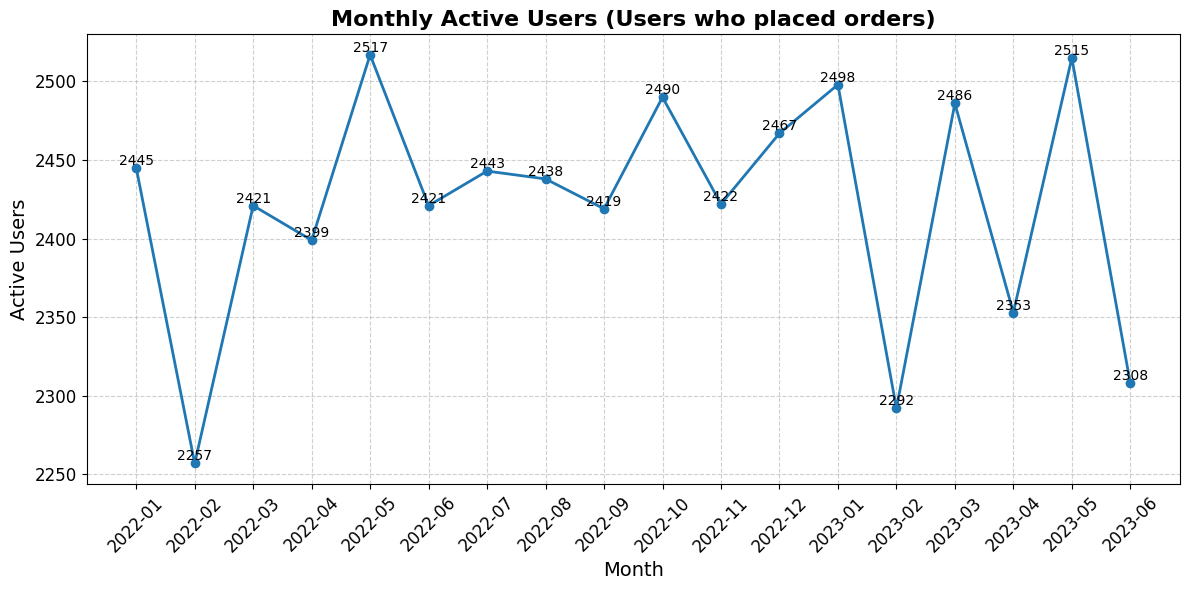

In [12]:
# Count the active users who placed at least one order in each month.

import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'order_datetime' to DateTime format
df_orders['order_datetime'] = pd.to_datetime(df_orders['order_datetime'])

# Create a new column 'year_month' from 'order_datetime' for grouping
df_orders['year_month'] = df_orders['order_datetime'].dt.to_period('M')

# Group by year_month and count unique user_ids (active users) per month
active_users_monthly = df_orders.groupby('year_month')['user_id'].nunique().reset_index()

# Rename columns for clarity
active_users_monthly.columns = ['Month', 'Active_Users']

# Print the resulting DataFrame with Month and number of active users.
print(active_users_monthly)

# Plot the monthly active users trend
plt.figure(figsize=(12, 6))
plt.plot(active_users_monthly['Month'].astype(str), active_users_monthly['Active_Users'],
         marker='o', linestyle='-', color='tab:blue', linewidth=2, markersize=6) # Plot with markers and line style

plt.title('Monthly Active Users (Users who placed orders)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Active Users', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

for x, y in zip(active_users_monthly['Month'].astype(str), active_users_monthly['Active_Users']):
    plt.text(x, y, f'{y}', fontsize=10, ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 6.1.2 What is the distribution of orders per user? (e.g., frequent vs occasional users)

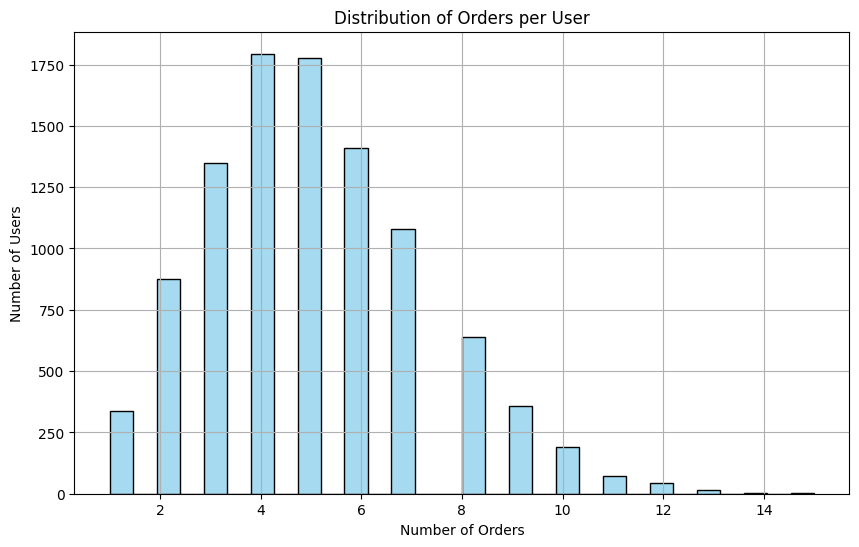



Order Count Summary Statistics:

count    9937.000000
mean        5.031700
std         2.212335
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        15.000000
Name: order_count, dtype: float64

Interpretation:
- Total users analyzed: 9937
- Average orders per user: 5.03
- Standard deviation: 2.21
- Minimum orders by any user: 1
- 25% of users placed 3 or fewer orders
- Median (50%) orders placed: 5
- 75% of users placed 6 or fewer orders
- Maximum orders by any user: 15

This indicates that most users place between 3 and 6 orders, with an average around 5 orders.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count the number of orders per user
orders_per_user = df_orders.groupby('user_id')['order_id'].nunique().reset_index()
orders_per_user.columns = ['user_id', 'order_count']

# Step 2: Explore the distribution by plotting a histogram
plt.figure(figsize=(10,6))
sns.histplot(orders_per_user['order_count'], bins=30, kde=False, color='skyblue')

plt.title('Distribution of Orders per User')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

order_count_stats = orders_per_user['order_count'].describe()

print('\n')
print("Order Count Summary Statistics:\n")
print(order_count_stats)

print("\nInterpretation:")
print(f"- Total users analyzed: {int(order_count_stats['count'])}")
print(f"- Average orders per user: {order_count_stats['mean']:.2f}")
print(f"- Standard deviation: {order_count_stats['std']:.2f}")
print(f"- Minimum orders by any user: {int(order_count_stats['min'])}")
print(f"- 25% of users placed {int(order_count_stats['25%'])} or fewer orders")
print(f"- Median (50%) orders placed: {int(order_count_stats['50%'])}")
print(f"- 75% of users placed {int(order_count_stats['75%'])} or fewer orders")
print(f"- Maximum orders by any user: {int(order_count_stats['max'])}")

print("\nThis indicates that most users place between 3 and 6 orders, with an average around 5 orders.")

### 6.1.3 What percentage of users are loyal customers vs new users?

User Loyalty Distribution:
Loyal Users: 3024 (30.24%)
New Users: 6976 (69.76%)


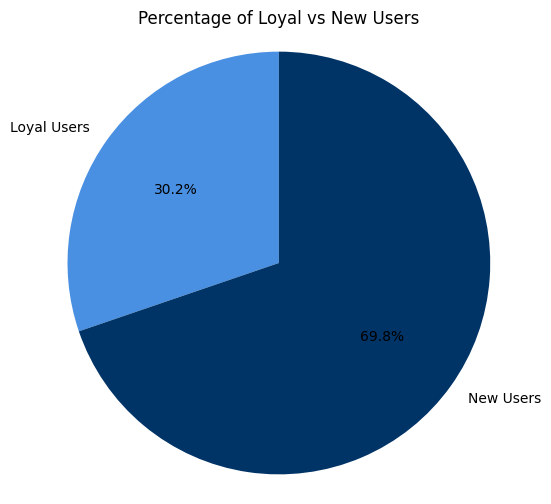

In [10]:
# Calculate counts
loyal_counts = df_users['is_loyal'].value_counts()

# Calculate percentages
loyal_percentages = (loyal_counts / loyal_counts.sum()) * 100

# Print results
print("User Loyalty Distribution:")
print(f"Loyal Users: {loyal_counts.get(True, 0)} ({loyal_percentages.get(True, 0):.2f}%)")
print(f"New Users: {loyal_counts.get(False, 0)} ({loyal_percentages.get(False, 0):.2f}%)")

# Define labels and sizes for the pie chart
labels = ['Loyal Users', 'New Users']
sizes = [loyal_counts.get(True, 0), loyal_counts.get(False, 0)]

# Plot pie chart with light and dark blue colors
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['#4A90E2', '#003366'])  # light blue and dark blue
plt.title('Percentage of Loyal vs New Users')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

### 6.1.4 Which cities have the highest user signup rates?

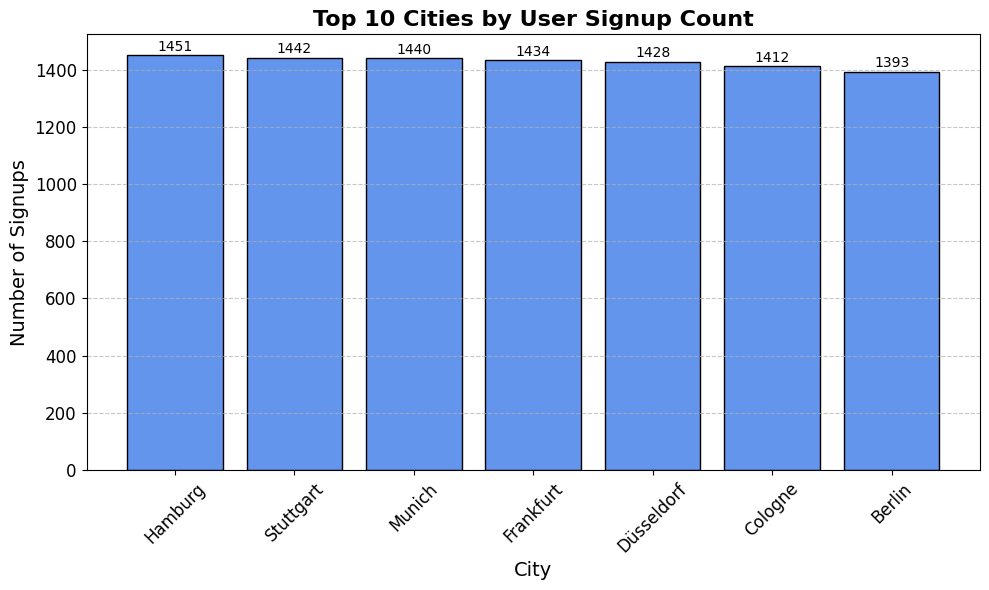

In [11]:
# Normalize city names (optional but recommended)
df_users['city'] = df_users['city'].str.strip().str.title()

# Count users by city and get top 10
signup_counts = df_users['city'].value_counts().head(10).reset_index()
signup_counts.columns = ['City', 'Signup Count']

# Plot with improved style
plt.figure(figsize=(10, 6))
bars = plt.bar(signup_counts['City'], signup_counts['Signup Count'], color='cornflowerblue', edgecolor='black')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Cities by User Signup Count', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Step 7: Visualization

# Step 8: Document Your Findings
Use Markdown cells in Colab to write your insights and conclusions based on the data.